In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(style='ticks', font_scale=1.5)
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6

## graph

In [40]:
data = pd.read_csv('results_template.csv')

In [41]:
data

,N,T1,Tp,p
0,1000,0.01000,0.000010,3
1,1000,0.01340,0.000023,4
2,1000,0.01870,0.000110,5
3,1000000,0.06560,0.000343,3
4,1000000,0.04758,0.000380,4
5,1000000,0.08403,0.000986,5
6,100000000,0.47890,0.004434,3
7,100000000,0.58793,0.006798,4
8,100000000,0.68702,0.008857,5


In [42]:
data.columns

Index(['N', ' T1', ' Tp', ' p'], dtype='object')

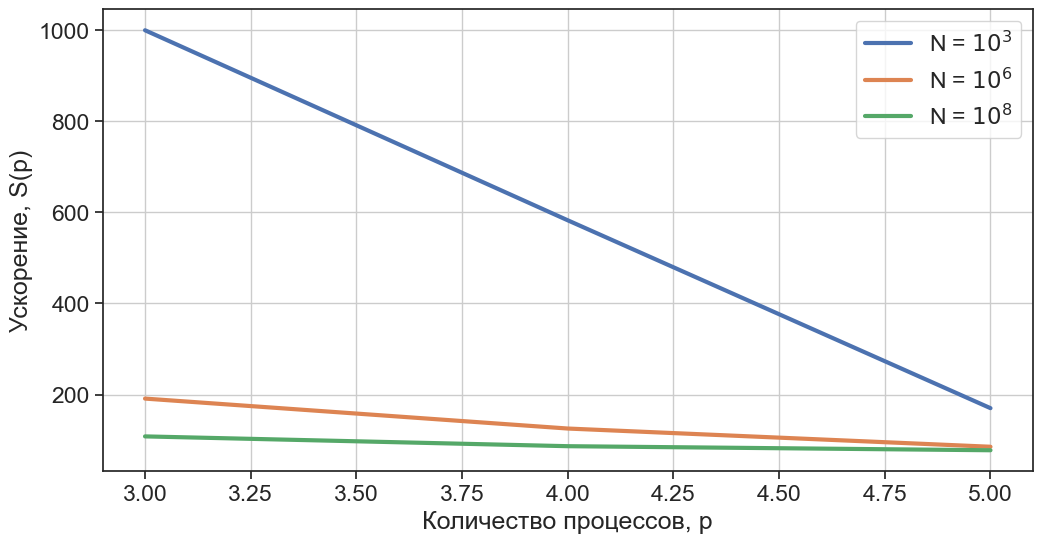

In [46]:
labels = {1000: r'$10^3$', 1000000: r'$10^6$', 100000000: r'$10^8$'}

N_list = data['N'].values

for N in np.unique(N_list):
    indexes = np.where(N_list == N)[0]
    T1 = data[' T1'].values[indexes]
    Tp = data[' Tp'].values[indexes]
    p = data[' p'].values[indexes]
    
    S = T1 / Tp
    plt.plot(p, S, lw=3, label=f'N = {labels[N]}')
    
plt.xlabel('Количество процессов, p')
plt.ylabel('Ускорение, S(p)')
plt.legend()
plt.grid()

## integral

In [105]:
def func(x):
    return 4 / (1 + x**2)
    # return np.sin(100*x) * np.exp(-(x**2)) * np.cos(2*x)

In [113]:
a = 0
b = 1
N = 100000000
x = np.linspace(a, b, N+1)
f = func(x)

In [114]:
x

array([0.0000000e+00, 1.0000000e-08, 2.0000000e-08, ..., 9.9999998e-01,
       9.9999999e-01, 1.0000000e+00])

In [115]:
f

array([4.        , 4.        , 4.        , ..., 2.00000004, 2.00000002,
       2.        ])

In [116]:
h = x[i+1] - x[i]
h

9.999999999940612e-09

In [117]:
%%time
s = 0
for i in range(len(x) - 1):
    # s += (f[i] + f[i+1]) * (x[i+1] - x[i]) * 0.5
    s += (f[i] + f[i+1]) * h * 0.5    

CPU times: total: 36.1 s
Wall time: 1min 2s
